In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


Vimos que o K-Means utiliza o conceito de centróides para agrupar os dados. Mas como podemos visualizá-los em um gráfico?

Vamos pedir para a biblioteca sklearn gerar alguns dados em duas dimensões para conseguirmos visualizar seus centróides.

Para criar os dados, vamos utilizar a função make_blobs da biblioteca sklearn no módulo dos datasets. Essa função gera dados em formas de "bolhas", isto é, os dados são gerados em forma de grupos:

A função make_blobs nos retorna os xn... e o valor de y, isto é, as variáveis independentes e a variável dependente.

In [3]:
# Como queremos os dados em duas dimensões, falamos que o número de features (n_features) 
# deve ser igual a 2 com 1000 exemplos (n_samples) de testes e para termos os mesmos dados, 
# vamos setar o parâmetro de aleatoriedade como 7 (random_state):

dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7)

# Como o make_blobs nos retorna um par de dados (x, y) e não queremos o y, usamos o underscore (_) 
# para ignorar o retorno dessa variável.
# Vamos transformar estes dados em um DataFrame do pandas e renomear as colunas para coluna1 e coluna2.

dados = pd.DataFrame(dados, columns=['coluna1', 'coluna2'])
dados.head()

,coluna1,coluna2
0,9.829632,0.763094
1,-9.723548,4.100788
2,10.403457,1.761671
3,-2.253417,4.660486
4,13.059859,-0.004112


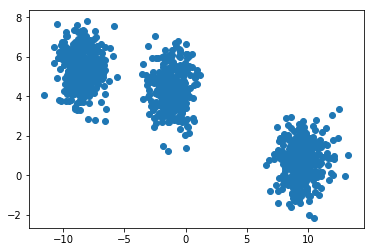

In [4]:
# Em seguida, cruzamos os dados das colunas e plotamos a distribuição.
plt.scatter(x=dados.coluna1, y=dados.coluna2)


In [5]:
# Pedimos ao KMeans para criar um modelo com 3 grupos e seguimentar os nossos dados baseado no modelo criado.
modelo = KMeans(n_clusters=3)
grupos = modelo.fit_predict(dados)

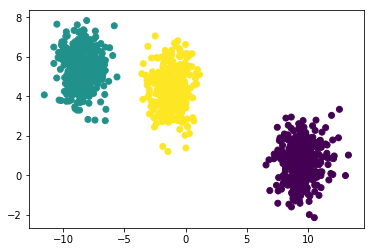

In [6]:
#Plotamos os dados seguimentados identificando os grupos com cores distintas (c=grupos) e vívidas (cmap='viridis').
plt.scatter(x=dados.coluna1, y=dados.coluna2, 
            c=grupos,
           cmap='viridis')

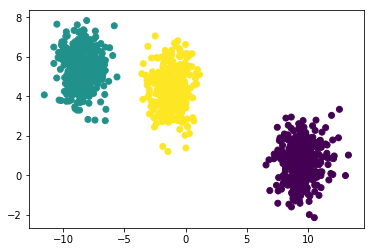

In [7]:
# Geramos pontos centrais para os grupos, chamados centroides, e plotamos novamente nossos grupos.
centroides = modelo.cluster_centers_
plt.scatter(dados.coluna1, dados.coluna2,
            c=grupos,
           cmap='viridis')


O pandas nos devolve os centroides em forma de matriz, então montamos a localização cartesiana pegando a posição 0 para o eixo x (centroides[:,0]) e a posição 1 para o eixo y (centroides[:,1]) . Também podemos estilizar a representação do nosso centroide, marcando como um X (marker='X'), setando o tamanho (s=169), a largura da linha (linewidths=5), cor (color=g) e a hierarquia de aparição (zorder=8). Com isso, temos nossos dados plotados em 3 grupos de cores distintas com centroides bem localizados.

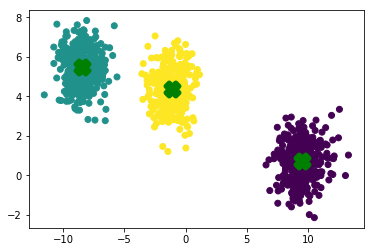

In [8]:
centroides = modelo.cluster_centers_
plt.scatter(dados.coluna1, dados.coluna2,
            c=grupos,
           cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1],
           marker='X', s=169, linewidths=5,
           color='g', zorder=8)

## Agrupamento pela densidade de pontos -  DBSCAN
No agrupamento particionado (KMeans) e hierárquico (AgglomerativeClustering) precisamos passar o número de clusters. Quando não possuímos esse número, o agrupamento por densidade (DBSCAN) tenta resolver isso. Nele, não passamos o número de clusters e ele tentará agrupar os dados pela densidade dos pontos.

In [9]:
from sklearn.cluster import DBSCAN

In [10]:
modelo = DBSCAN()
grupos = modelo.fit_predict(dados)

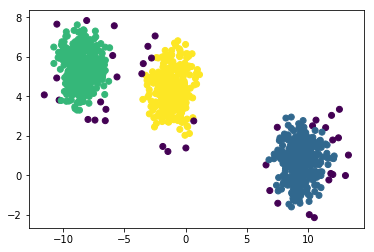

In [13]:
plt.scatter(dados.coluna1, dados.coluna2,
            c=grupos,
           cmap='viridis')